# Multiclass classification

### Collecting data

- [x] Explore [sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) for **Multiclass classification**, **Multilabel classification** and **Multioutput Regression**. The main components of the library are shown in the figure below.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Find data that can solve the **Multiclass classification** problem (classification with more than two classes). As a last resort, convert data intended for another task.

In [1]:
import pandas as pd
pd.set_option("display.max.columns", None)

In [2]:
df = pd.read_csv("./data/Chicago_Crime_Final_Data.csv")
df

,primary_type,location_description,beat,ward,Date,Hour,HubDist,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,WT01,WT02,WT03,WT04,WT06,WT08,WT09,DayOfWeek,Month,Dholiday
0,ROBBERY,STREET,411,8.0,2021-01-14,6,2.501112,8.625000,0.000000,0.0,46.000000,4.000000,170.0,85.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
1,DECEPTIVE PRACTICE,RESIDENCE,1613,41.0,2021-01-28,12,4.484144,0.625000,0.000000,136.0,-30.666667,-108.666667,330.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
2,DECEPTIVE PRACTICE,RESIDENCE,1613,45.0,2021-02-01,9,2.305444,49.142857,72.500000,365.2,7.666667,-40.333333,180.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0.0
3,DECEPTIVE PRACTICE,RESIDENCE,212,4.0,2021-02-22,12,1.503849,39.875000,12.000000,416.0,46.000000,-32.333333,240.0,103.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,2,0.0
4,WEAPONS VIOLATION,SIDEWALK,432,10.0,2021-03-15,11,2.927048,9.125000,6.571429,0.0,42.333333,-14.333333,90.0,125.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187984,OTHER OFFENSE,APARTMENT,2023,48.0,2021-04-17,11,2.247161,0.000000,0.000000,0.0,118.333333,28.000000,40.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,0.0
187985,OTHER OFFENSE,APARTMENT,2013,48.0,2021-07-19,7,1.611979,0.000000,0.000000,0.0,274.000000,188.666667,85.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,0.0
187986,OTHER OFFENSE,APARTMENT,2433,48.0,2021-08-19,12,1.427598,3.250000,0.000000,0.0,298.333333,227.666667,120.0,65.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3,8,0.0
187987,OTHER OFFENSE,RESIDENCE,2433,48.0,2021-07-28,5,0.495757,40.100000,0.000000,0.0,316.666667,224.000000,270.0,85.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,7,0.0


Since the dataset was already cleaned [here](https://github.com/Mark-Rozenberg/Crime-And-Climate/blob/main/Chicago_Crime_PreProcess.ipynb), I am skipping the data cleaning steps.

- [x] If necessary, perform useful data transformations (for example, transform categorical features into quantitative ones), remove unnecessary features, create new ones (**Feature Engineering**).

### Feature engineering

In [3]:
df.columns

Index(['primary_type', 'location_description', 'beat', 'ward', 'Date', 'Hour',
       'HubDist', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WSF2',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WT09', 'DayOfWeek',
       'Month', 'Dholiday'],
      dtype='object')

According to the data description [here](https://github.com/Mark-Rozenberg/Crime-And-Climate/blob/main/README.md), the column names are changed for better understandibility.

In [4]:
df.columns = ['crime_type', 'location_desc', 'police_area', 'city_district', 'date', 'hour',
       'police_dist', 'precipitation', 'snowfall', 'snow_depth', 'temp_max', 'temp_min', 'wind_dir', 'wind_speed',
       'fog', 'fog_heavy', 'thunder', 'ice_pellet', 'glaze_rime', 'smoke_haze', 'snow_drift', 'day_week',
       'month', 'holiday']
df

,crime_type,location_desc,police_area,city_district,date,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,fog,fog_heavy,thunder,ice_pellet,glaze_rime,smoke_haze,snow_drift,day_week,month,holiday
0,ROBBERY,STREET,411,8.0,2021-01-14,6,2.501112,8.625000,0.000000,0.0,46.000000,4.000000,170.0,85.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
1,DECEPTIVE PRACTICE,RESIDENCE,1613,41.0,2021-01-28,12,4.484144,0.625000,0.000000,136.0,-30.666667,-108.666667,330.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
2,DECEPTIVE PRACTICE,RESIDENCE,1613,45.0,2021-02-01,9,2.305444,49.142857,72.500000,365.2,7.666667,-40.333333,180.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0.0
3,DECEPTIVE PRACTICE,RESIDENCE,212,4.0,2021-02-22,12,1.503849,39.875000,12.000000,416.0,46.000000,-32.333333,240.0,103.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,2,0.0
4,WEAPONS VIOLATION,SIDEWALK,432,10.0,2021-03-15,11,2.927048,9.125000,6.571429,0.0,42.333333,-14.333333,90.0,125.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187984,OTHER OFFENSE,APARTMENT,2023,48.0,2021-04-17,11,2.247161,0.000000,0.000000,0.0,118.333333,28.000000,40.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,0.0
187985,OTHER OFFENSE,APARTMENT,2013,48.0,2021-07-19,7,1.611979,0.000000,0.000000,0.0,274.000000,188.666667,85.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,0.0
187986,OTHER OFFENSE,APARTMENT,2433,48.0,2021-08-19,12,1.427598,3.250000,0.000000,0.0,298.333333,227.666667,120.0,65.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3,8,0.0
187987,OTHER OFFENSE,RESIDENCE,2433,48.0,2021-07-28,5,0.495757,40.100000,0.000000,0.0,316.666667,224.000000,270.0,85.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,7,0.0


In [5]:
frequent_crimes = ['BATTERY','THEFT','CRIMINAL DAMAGE']
df = df[df['crime_type'].isin(frequent_crimes)]
df

,crime_type,location_desc,police_area,city_district,date,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,fog,fog_heavy,thunder,ice_pellet,glaze_rime,smoke_haze,snow_drift,day_week,month,holiday
5,BATTERY,CTA TRAIN,925,3.0,2021-03-21,5,0.820050,0.000000,0.00,0.000000,185.000000,37.000000,185.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0.0
11,BATTERY,RESIDENCE,432,10.0,2021-01-26,8,2.852532,107.875000,103.00,89.250000,0.000000,-34.333333,205.0,107.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.0
15,BATTERY,APARTMENT,915,3.0,2021-02-25,4,0.923250,0.000000,0.00,177.800000,48.000000,-27.000000,310.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0.0
18,BATTERY,APARTMENT,533,9.0,2021-02-25,12,4.019689,0.000000,0.00,177.800000,48.000000,-27.000000,310.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0.0
29,CRIMINAL DAMAGE,CTA PARKING LOT / GARAGE / OTHER PROPERTY,1711,39.0,2021-01-08,5,2.587782,0.714286,1.25,14.333333,20.333333,-7.000000,35.0,96.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187962,CRIMINAL DAMAGE,PARKING LOT / GARAGE (NON RESIDENTIAL),2023,48.0,2021-06-11,7,2.482903,0.000000,0.00,0.000000,305.666667,211.333333,180.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,6,0.0
187963,CRIMINAL DAMAGE,STREET,2023,48.0,2021-07-31,1,2.282463,0.000000,0.00,0.000000,261.000000,170.333333,270.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7,0.0
187964,CRIMINAL DAMAGE,STREET,2023,48.0,2021-11-15,4,2.380977,0.857143,0.00,0.000000,24.000000,-6.666667,305.0,69.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,11,0.0
187965,CRIMINAL DAMAGE,STREET,2022,48.0,2021-07-26,1,1.648409,0.000000,0.00,0.000000,324.000000,213.000000,265.0,58.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,0.0


Since the volume of the original data is too big for our purpose, we'll be sampling 1000 records randomly.

In [6]:
df = df.sample(n=1000)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
crime_types = le.fit_transform(df["crime_type"])
df["crime_type_cat"] = crime_types
df

,crime_type,location_desc,police_area,city_district,date,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,fog,fog_heavy,thunder,ice_pellet,glaze_rime,smoke_haze,snow_drift,day_week,month,holiday,crime_type_cat
157437,THEFT,ALLEY,1424,1.0,2021-09-05,12,2.311494,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,9,0.0,2
58524,THEFT,APARTMENT,1632,38.0,2021-04-24,11,3.082551,0.625000,0.0,0.0,161.333333,67.000000,30.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,0.0,2
130702,THEFT,STREET,922,15.0,2021-06-28,5,3.740493,96.000000,0.0,0.0,270.333333,183.333333,290.0,63.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,6,0.0,2
1021,BATTERY,RESIDENCE,432,10.0,2021-06-06,10,3.198022,0.000000,0.0,0.0,309.333333,222.333333,175.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0.0,0
40247,BATTERY,STREET,715,16.0,2021-02-28,9,1.545184,3.714286,0.0,81.5,98.000000,13.000000,260.0,129.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133369,THEFT,STREET,831,18.0,2021-06-08,12,2.078841,2.428571,0.0,0.0,300.000000,205.666667,105.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,0.0,2
4854,CRIMINAL DAMAGE,RESIDENCE,2411,50.0,2021-10-16,5,2.613149,4.875000,0.0,0.0,152.000000,70.666667,285.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,10,0.0,1
143592,THEFT,CTA TRAIN,914,25.0,2021-09-05,1,0.679038,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,9,0.0,2
131718,THEFT,RESIDENCE,934,20.0,2021-04-23,5,1.853023,0.000000,0.0,0.0,163.000000,64.000000,230.0,91.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0.0,2


In [8]:
locations = le.fit_transform(df["location_desc"])
locations
df["location_desc_cat"] = locations
df

,crime_type,location_desc,police_area,city_district,date,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,fog,fog_heavy,thunder,ice_pellet,glaze_rime,smoke_haze,snow_drift,day_week,month,holiday,crime_type_cat,location_desc_cat
157437,THEFT,ALLEY,1424,1.0,2021-09-05,12,2.311494,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,9,0.0,2,3
58524,THEFT,APARTMENT,1632,38.0,2021-04-24,11,3.082551,0.625000,0.0,0.0,161.333333,67.000000,30.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,0.0,2,4
130702,THEFT,STREET,922,15.0,2021-06-28,5,3.740493,96.000000,0.0,0.0,270.333333,183.333333,290.0,63.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,6,0.0,2,49
1021,BATTERY,RESIDENCE,432,10.0,2021-06-06,10,3.198022,0.000000,0.0,0.0,309.333333,222.333333,175.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0.0,0,39
40247,BATTERY,STREET,715,16.0,2021-02-28,9,1.545184,3.714286,0.0,81.5,98.000000,13.000000,260.0,129.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6,2,0.0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133369,THEFT,STREET,831,18.0,2021-06-08,12,2.078841,2.428571,0.0,0.0,300.000000,205.666667,105.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,0.0,2,49
4854,CRIMINAL DAMAGE,RESIDENCE,2411,50.0,2021-10-16,5,2.613149,4.875000,0.0,0.0,152.000000,70.666667,285.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,10,0.0,1,39
143592,THEFT,CTA TRAIN,914,25.0,2021-09-05,1,0.679038,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,9,0.0,2,19
131718,THEFT,RESIDENCE,934,20.0,2021-04-23,5,1.853023,0.000000,0.0,0.0,163.000000,64.000000,230.0,91.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0.0,2,39


### EDA

- [x] Perform exploratory analysis (**EDA**), use visualization, draw conclusions that may be useful in further solving the problem.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 157437 to 183369
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   crime_type         1000 non-null   object 
 1   location_desc      1000 non-null   object 
 2   police_area        1000 non-null   int64  
 3   city_district      1000 non-null   float64
 4   date               1000 non-null   object 
 5   hour               1000 non-null   int64  
 6   police_dist        1000 non-null   float64
 7   precipitation      1000 non-null   float64
 8   snowfall           1000 non-null   float64
 9   snow_depth         1000 non-null   float64
 10  temp_max           1000 non-null   float64
 11  temp_min           1000 non-null   float64
 12  wind_dir           1000 non-null   float64
 13  wind_speed         1000 non-null   float64
 14  fog                1000 non-null   float64
 15  fog_heavy          1000 non-null   float64
 16  thunder          

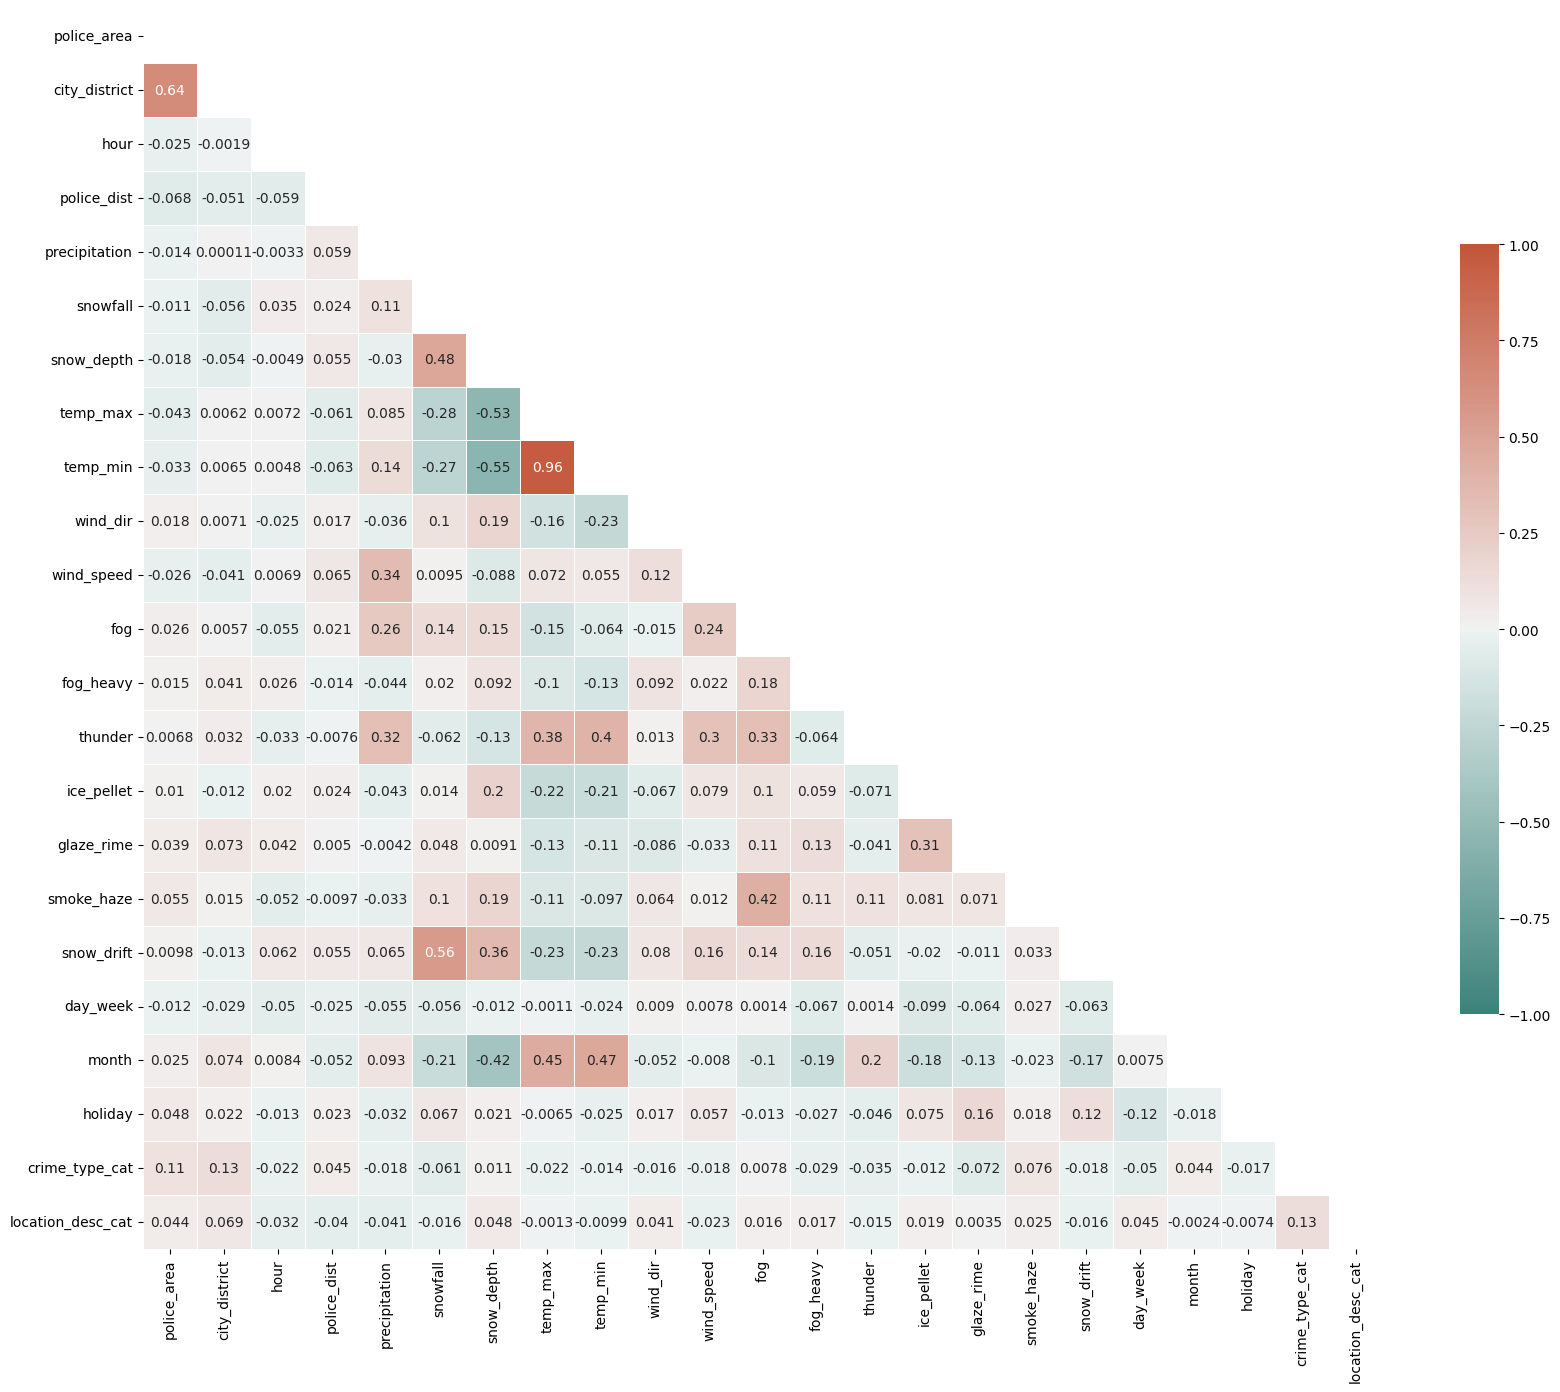

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

correlation = df.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [11]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
crime_type,3
location_desc,53
police_area,258
city_district,50
date,327
hour,12
police_dist,973
precipitation,151
snowfall,33
snow_depth,49


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
police_area,1000.0,1120.958000,681.581989,111.000000,612.000000,1014.000000,1633.000000,2535.000000
city_district,1000.0,22.588000,13.771925,1.000000,9.000000,23.000000,33.000000,50.000000
hour,1000.0,6.807000,3.505715,1.000000,4.000000,7.000000,10.000000,12.000000
police_dist,1000.0,1.966725,1.115969,0.012379,1.273032,1.820983,2.416887,11.529803
precipitation,1000.0,29.395227,73.678597,0.000000,0.000000,1.142857,21.875000,614.875000
snowfall,1000.0,2.404629,16.573053,0.000000,0.000000,0.000000,0.000000,295.000000
snow_depth,1000.0,29.017400,95.822988,0.000000,0.000000,0.000000,0.000000,649.800000
temp_max,1000.0,175.375333,113.209573,-145.666667,98.000000,199.166667,274.083333,350.000000
temp_min,1000.0,90.746667,104.391192,-210.666667,7.666667,105.500000,186.666667,250.000000
wind_dir,1000.0,184.550000,100.446688,10.000000,95.000000,200.000000,260.000000,360.000000


<AxesSubplot: ylabel='Frequency'>

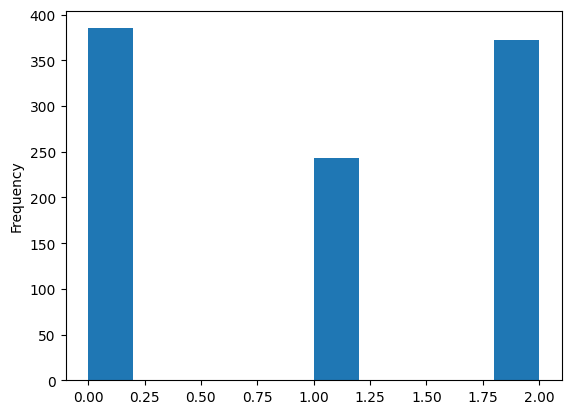

In [13]:
df["crime_type_cat"].plot.hist()

In [14]:
df.groupby("crime_type_cat").mean()

,police_area,city_district,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,fog,fog_heavy,thunder,ice_pellet,glaze_rime,smoke_haze,snow_drift,day_week,month,holiday,location_desc_cat
crime_type_cat,,,,,,,,,,,,,,,,,,,,,,
0,1046.664935,20.961039,6.901299,1.881408,32.000058,3.351478,27.245541,175.114719,89.559740,184.792208,87.318182,0.400000,0.023377,0.163636,0.033766,0.018182,0.187013,0.010390,3.275325,6.192208,0.036364,27.379221
1,1092.563786,21.316872,6.790123,2.059332,25.966761,2.996767,30.910151,184.945130,99.615912,189.670782,89.773663,0.423868,0.032922,0.168724,0.012346,0.004115,0.283951,0.032922,3.057613,6.049383,0.028807,32.168724
2,1216.395161,25.102151,6.720430,1.994530,28.938928,1.037890,29.614785,169.393817,86.181452,180.954301,86.278226,0.408602,0.013441,0.134409,0.029570,0.002688,0.260753,0.005376,3.043011,6.516129,0.029570,32.736559


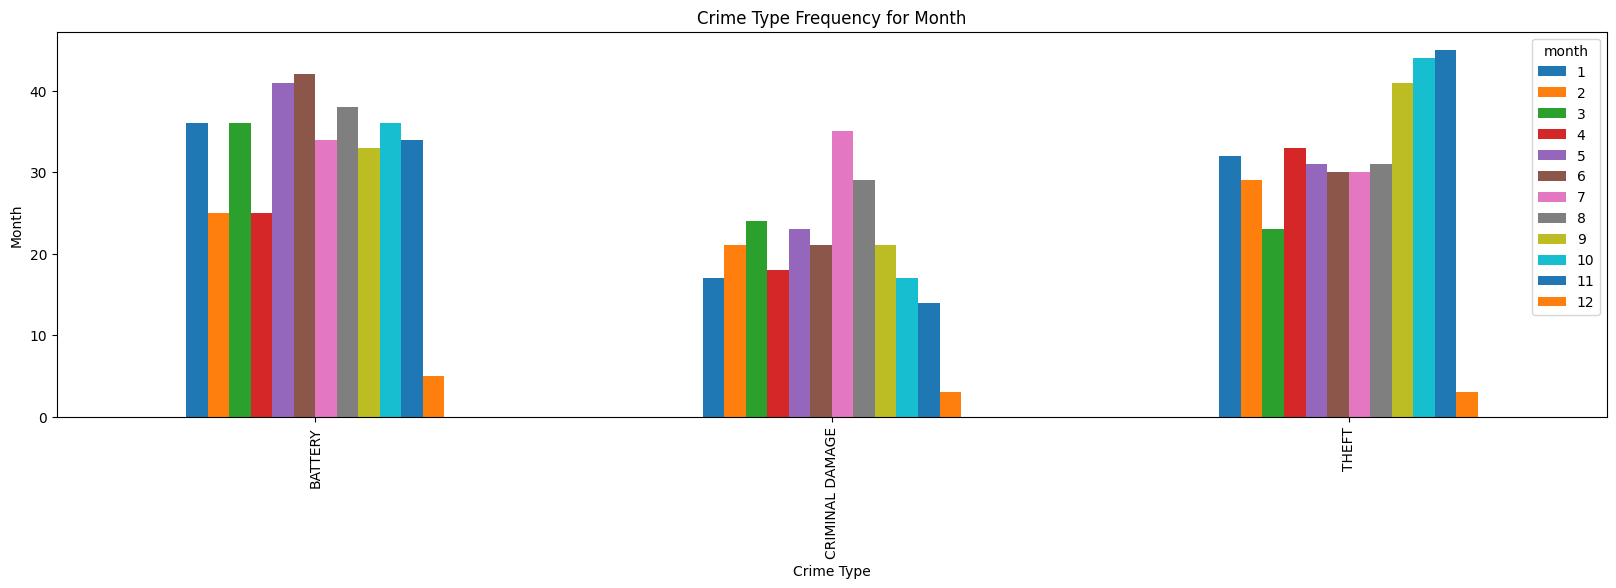

In [15]:
pd.crosstab(df.crime_type,df.month).plot(kind="bar", figsize=(20, 5))
plt.title("Crime Type Frequency for Month")
plt.xlabel("Crime Type")
plt.ylabel("Month")
plt.show()

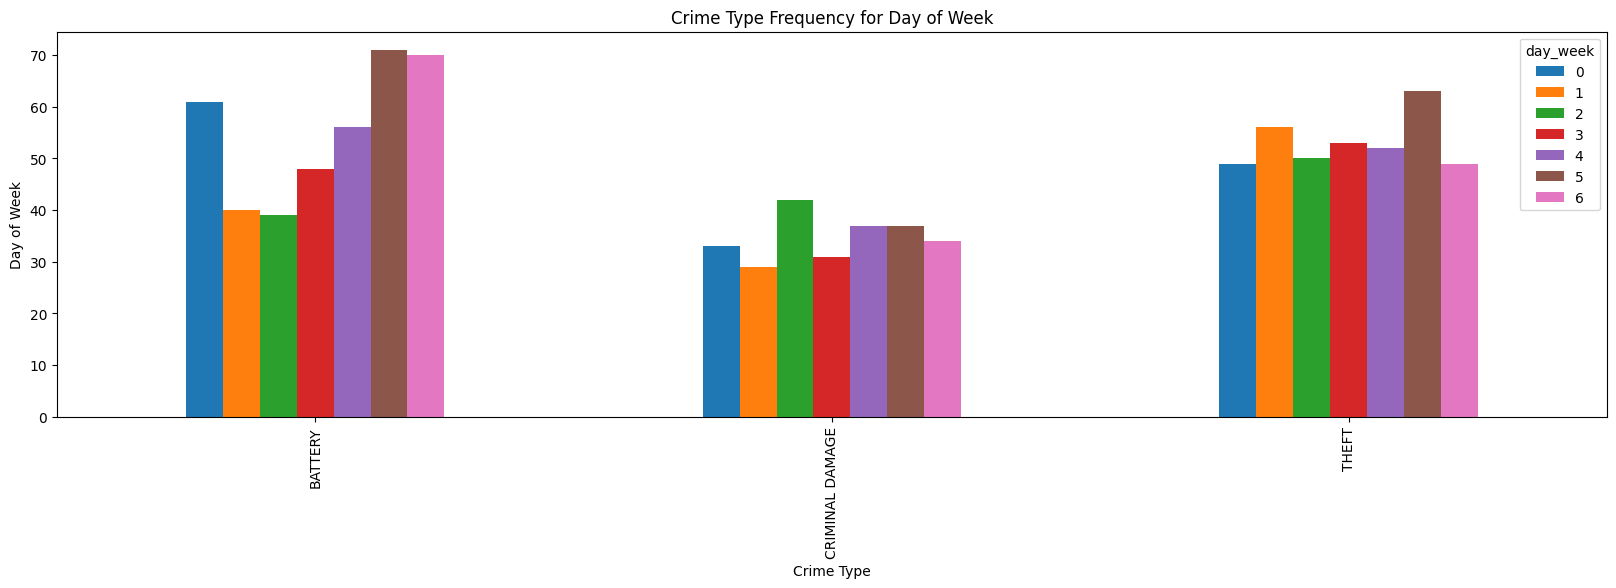

In [16]:
pd.crosstab(df.crime_type,df.day_week).plot(kind="bar", figsize=(20, 5))
plt.title("Crime Type Frequency for Day of Week")
plt.xlabel("Crime Type")
plt.ylabel("Day of Week")
plt.show()

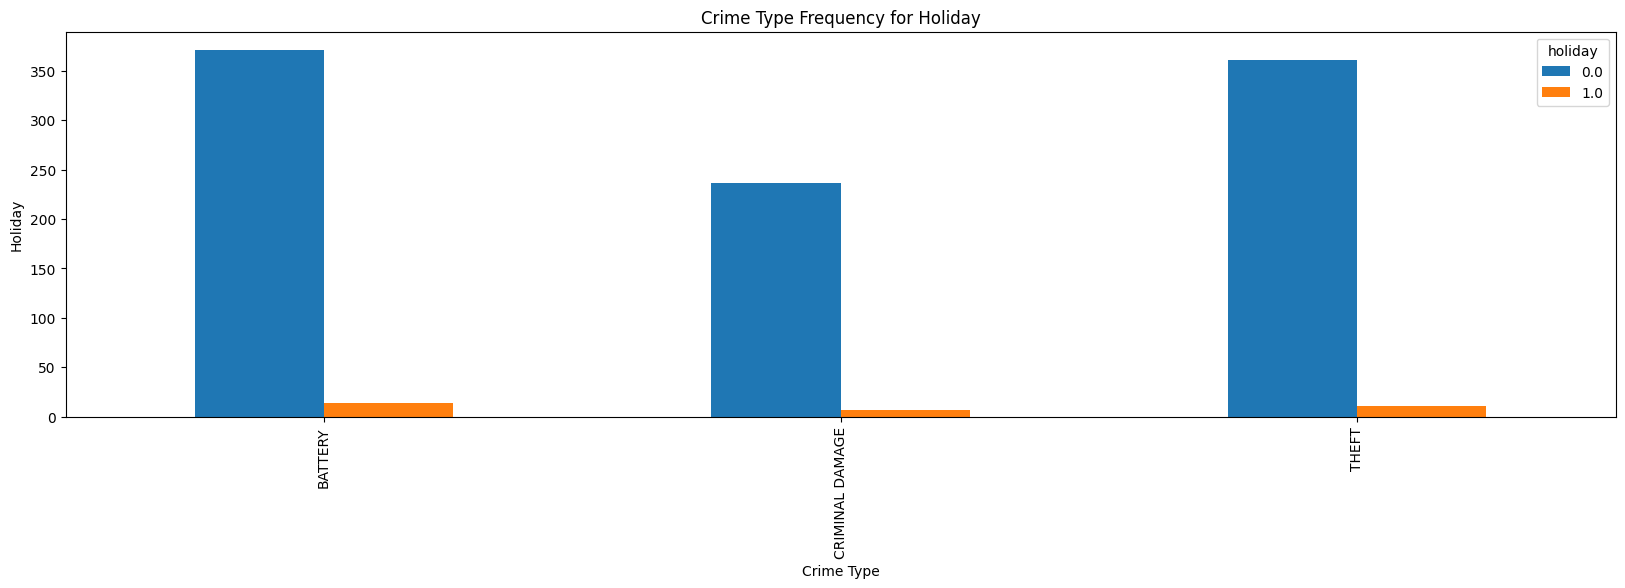

In [17]:
pd.crosstab(df.crime_type,df.holiday).plot(kind="bar", figsize=(20, 5))
plt.title("Crime Type Frequency for Holiday")
plt.xlabel("Crime Type")
plt.ylabel("Holiday")
plt.show()

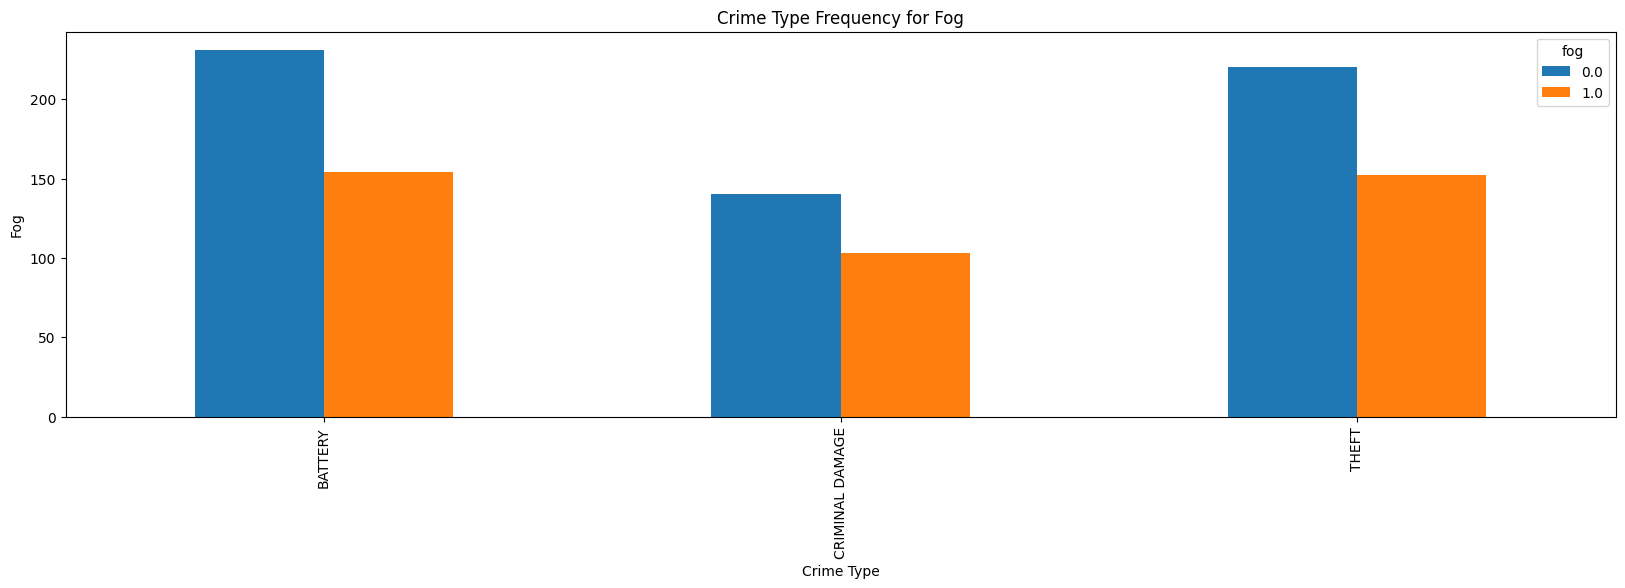

In [18]:
pd.crosstab(df.crime_type,df.fog).plot(kind="bar", figsize=(20, 5))
plt.title("Crime Type Frequency for Fog")
plt.xlabel("Crime Type")
plt.ylabel("Fog")
plt.show()

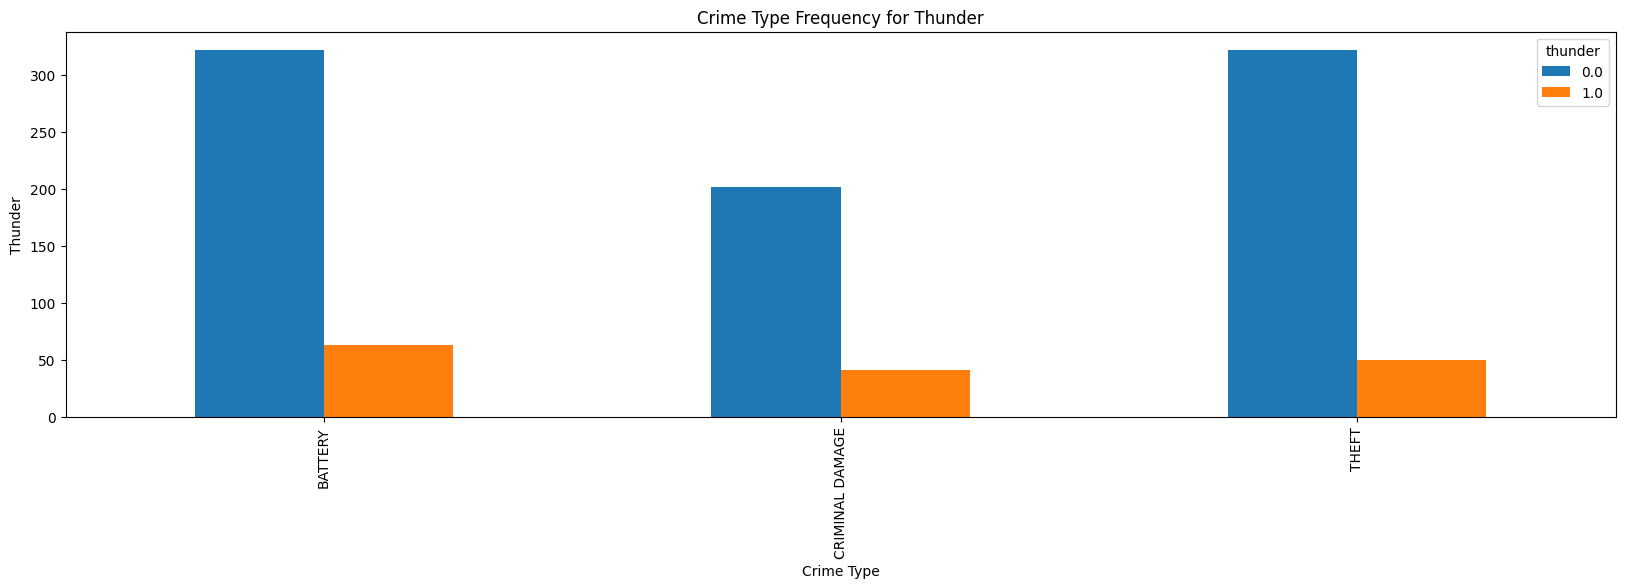

In [19]:
pd.crosstab(df.crime_type,df.thunder).plot(kind="bar", figsize=(20, 5))
plt.title("Crime Type Frequency for Thunder")
plt.xlabel("Crime Type")
plt.ylabel("Thunder")
plt.show()

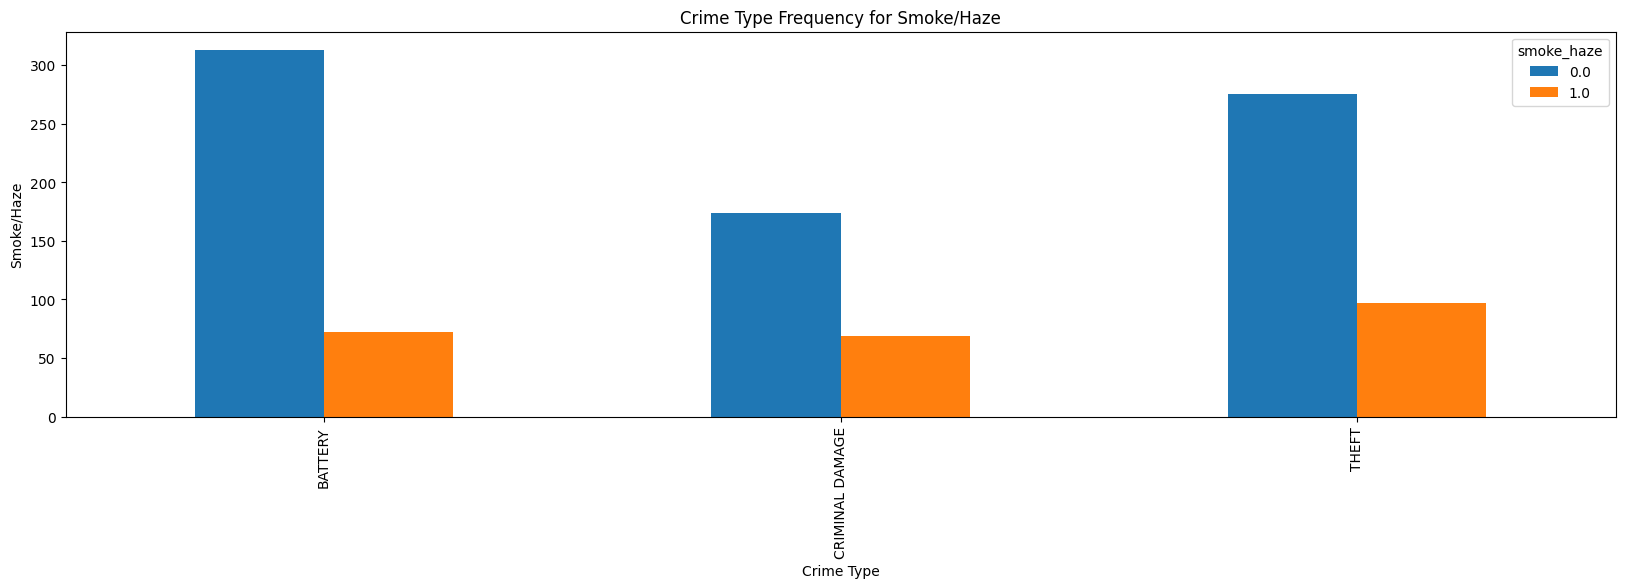

In [20]:
pd.crosstab(df.crime_type,df.smoke_haze).plot(kind="bar", figsize=(20, 5))
plt.title("Crime Type Frequency for Smoke/Haze")
plt.xlabel("Crime Type")
plt.ylabel("Smoke/Haze")
plt.show()

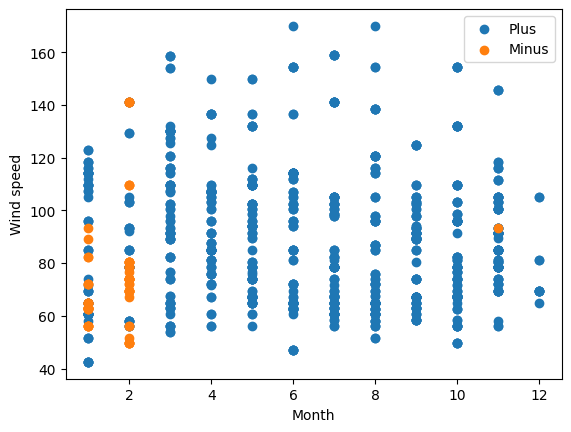

In [21]:
plt.scatter(x=df.month[df.temp_max>=0], y=df.wind_speed[(df.temp_max>=0)])
plt.scatter(x=df.month[df.temp_max<0], y=df.wind_speed[(df.temp_max<0)])
plt.legend(["Plus", "Minus"])
plt.xlabel("Month")
plt.ylabel("Wind speed")
plt.show()

In [22]:
df = df.drop(columns=["crime_type", "location_desc", "date", "fog", "fog_heavy", "thunder", "ice_pellet", "glaze_rime", "smoke_haze", "snow_drift", "holiday"])

We will try training without the dummy features from here on.

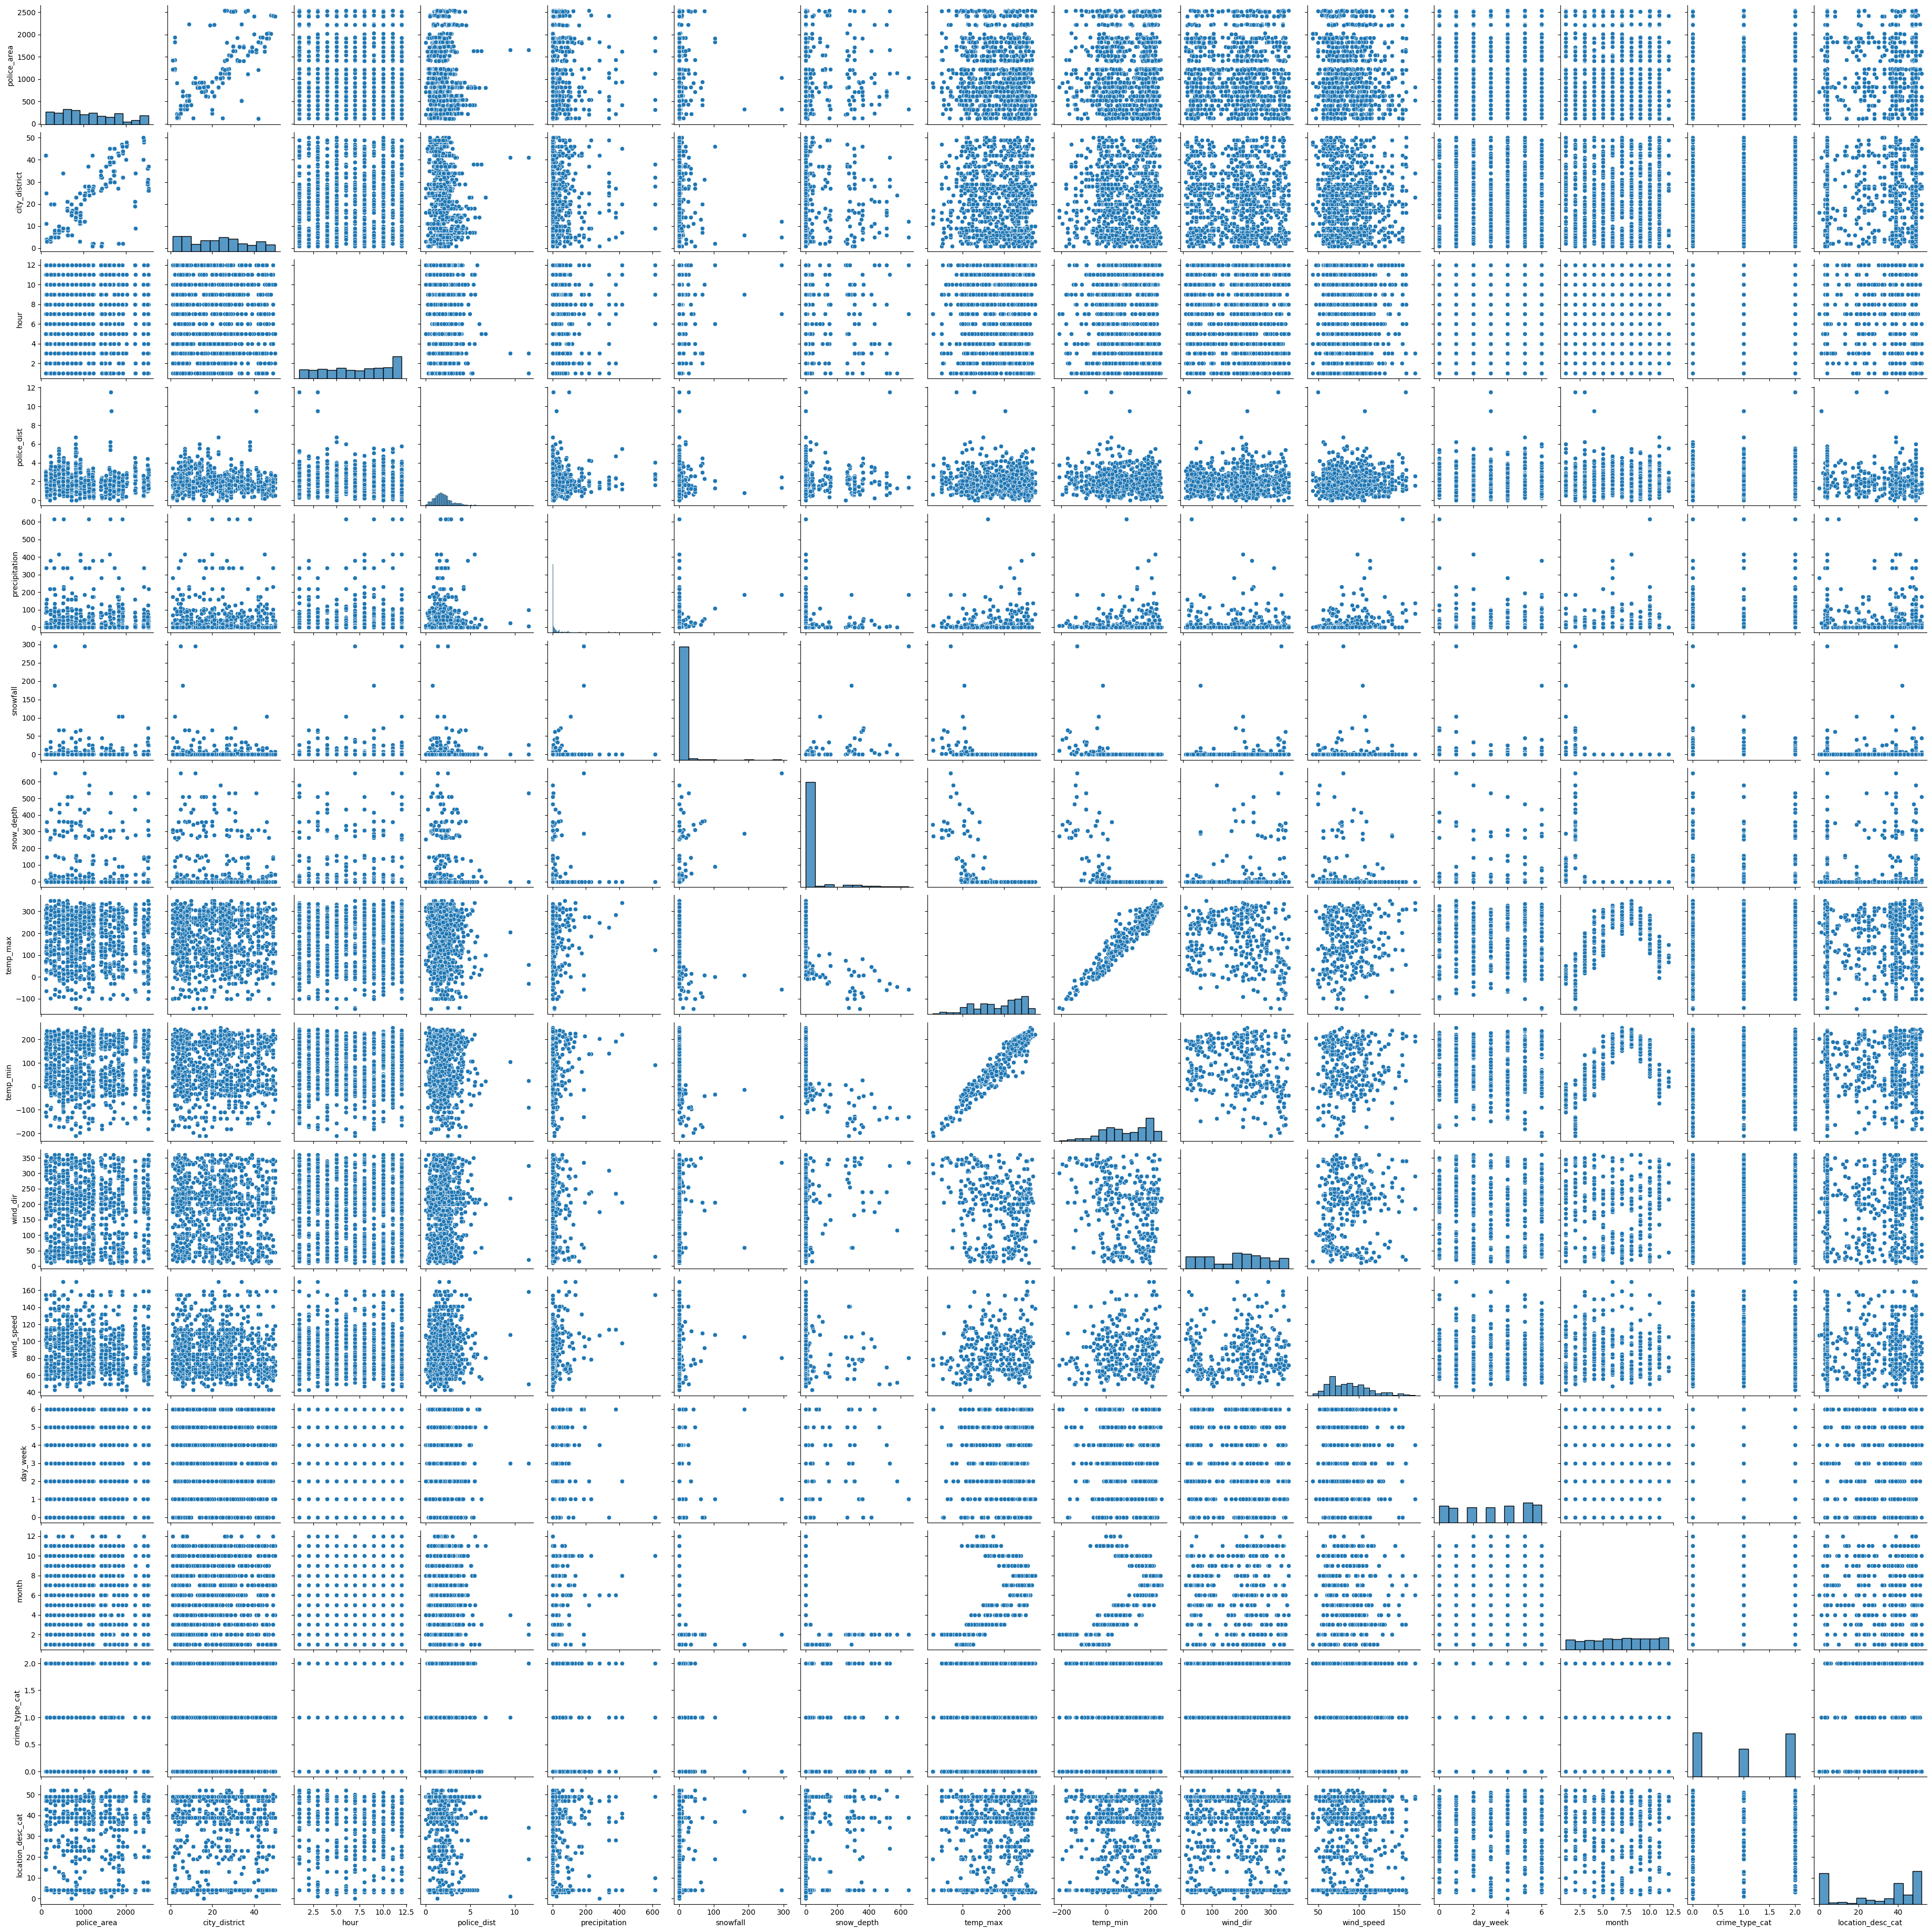

In [23]:
sns.pairplot(df)

### Training models

- [x] Using the **OneVsRest**, **OneVsOne** and **OutputCode** strategies, solve the **Multiclass classification** problem for each of the basic classification algorithms passed (**logistic regression, svm, knn, naive bayes, decision tree**). When training, use **hyperparameter fitting**, **cross-validation** and, if necessary, **data scaling**, to achieve the best prediction quality.
- [x] Measure the training time of each model for each strategy.
- [x] To assess the quality of models, use the **AUC-ROC** metric.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

X, y = df.drop(columns=["crime_type_cat"]), df["crime_type_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

training_results = []

#### Logistic regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

parameters = {"penalty" : ["l1", "l2"], "C": np.logspace(-3,3,7)}
cross_validation = StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
gs_logregr = GridSearchCV(LogisticRegression(), parameters, scoring="roc_auc", cv=cross_validation)

In [26]:
# OneVsRestClassifier

start = time.time()
ovr_logregr = OneVsRestClassifier(gs_logregr)
ovr_logregr.fit(X_train_scaled, y_train)
y_pred = ovr_logregr.predict(X_test_scaled)
ovr_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovr_score)

training_results.append({"model": "logistic-regression", "strategy": "one-vs-rest", "time": training_time, "accuracy": ovr_score})

training time: 1.0266470909118652
accuracy: 0.44


In [27]:
# OneVsOneClassifier

start = time.time()
ovo_logregr = OneVsOneClassifier(gs_logregr)
ovo_logregr.fit(X_train_scaled, y_train)
y_pred = ovo_logregr.predict(X_test_scaled)
ovo_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovo_score)

training_results.append({"model": "logistic-regression", "strategy": "one-vs-one", "time": training_time, "accuracy": ovo_score})

training time: 0.777055025100708
accuracy: 0.455


In [28]:
# OutputCodeClassifier

start = time.time()
oc_logregr = OutputCodeClassifier(gs_logregr)
oc_logregr.fit(X_train_scaled, y_train)
y_pred = oc_logregr.predict(X_test_scaled)
oc_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", oc_score)

training_results.append({"model": "logistic-regression", "strategy": "output-code", "time": training_time, "accuracy": oc_score})

training time: 0.7411353588104248
accuracy: 0.415


#### Support vector machine

In [29]:
from sklearn.svm import SVC

parameters = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001],
              "kernel": ["rbf"]}
gs_svm = GridSearchCV(SVC(), parameters, scoring="roc_auc", cv=10)

In [30]:
# OneVsRestClassifier

start = time.time()
ovr_svm = OneVsRestClassifier(gs_svm)
ovr_svm.fit(X_train_scaled, y_train)
y_pred = ovr_svm.predict(X_test_scaled)
ovr_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovr_score)

training_results.append({"model": "svm", "strategy": "one-vs-rest", "time": training_time, "accuracy": ovr_score})

training time: 11.065553903579712
accuracy: 0.38


In [31]:
# OneVsOneClassifier

start = time.time()
ovo_svm = OneVsOneClassifier(gs_svm)
ovo_svm.fit(X_train_scaled, y_train)
y_pred = ovo_svm.predict(X_test_scaled)
ovo_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovo_score)

training_results.append({"model": "svm", "strategy": "one-vs-one", "time": training_time, "accuracy": ovo_score})

training time: 5.161060333251953
accuracy: 0.43


In [32]:
# OutputCodeClassifier

start = time.time()
oc_svm = OutputCodeClassifier(gs_svm)
oc_svm.fit(X_train_scaled, y_train)
y_pred = oc_svm.predict(X_test_scaled)
oc_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", oc_score)

training_results.append({"model": "svm", "strategy": "output-code", "time": training_time, "accuracy": oc_score})

training time: 10.789955139160156
accuracy: 0.395


#### K-nearest neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {"n_neighbors": [3, 5, 11, 19]}
gs_knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring="roc_auc", cv=10)

In [34]:
# OneVsRestClassifier

start = time.time()
ovr_knn = OneVsRestClassifier(gs_knn)
ovr_knn.fit(X_train_scaled, y_train)
y_pred = ovr_knn.predict(X_test_scaled)
ovr_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovr_score)

training_results.append({"model": "knn", "strategy": "one-vs-rest", "time": training_time, "accuracy": ovr_score})

training time: 0.4021339416503906
accuracy: 0.42


In [35]:
# OneVsOneClassifier

start = time.time()
ovo_knn = OneVsOneClassifier(gs_knn)
ovo_knn.fit(X_train_scaled, y_train)
y_pred = ovo_knn.predict(X_test_scaled)
ovo_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovo_score)

training_results.append({"model": "knn", "strategy": "one-vs-one", "time": training_time, "accuracy": ovo_score})

training time: 0.335010290145874
accuracy: 0.44


In [36]:
# OutputCodeClassifier

start = time.time()
oc_knn = OutputCodeClassifier(gs_knn)
oc_knn.fit(X_train_scaled, y_train)
y_pred = oc_knn.predict(X_test_scaled)
oc_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", oc_score)

training_results.append({"model": "knn", "strategy": "output-code", "time": training_time, "accuracy": oc_score})

training time: 0.6193845272064209
accuracy: 0.385


#### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

parameters = {"var_smoothing": np.logspace(0,-9, num=100)}
gs_nb = GridSearchCV(GaussianNB(), parameters, scoring="roc_auc", cv=10)

In [38]:
# OneVsRestClassifier

start = time.time()
ovr_nb = OneVsRestClassifier(gs_nb)
ovr_nb.fit(X_train_scaled, y_train)
y_pred = ovr_nb.predict(X_test_scaled)
ovr_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovr_score)

training_results.append({"model": "naive-bayes", "strategy": "one-vs-rest", "time": training_time, "accuracy": ovr_score})

training time: 4.3682169914245605
accuracy: 0.335


In [39]:
# OneVsOneClassifier

start = time.time()
ovo_nb = OneVsOneClassifier(gs_nb)
ovo_nb.fit(X_train_scaled, y_train)
y_pred = ovo_nb.predict(X_test_scaled)
ovo_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovo_score)

training_results.append({"model": "naive-bayes", "strategy": "one-vs-one", "time": training_time, "accuracy": ovo_score})

training time: 4.224689960479736
accuracy: 0.335


In [40]:
# OutputCodeClassifier

start = time.time()
oc_nb = OutputCodeClassifier(gs_nb)
oc_nb.fit(X_train_scaled, y_train)
y_pred = oc_nb.predict(X_test_scaled)
oc_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", oc_score)

training_results.append({"model": "naive-bayes", "strategy": "output-code", "time": training_time, "accuracy": oc_score})

training time: 4.494954824447632
accuracy: 0.33


#### Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

parameters = {"max_leaf_nodes": list(range(2, 100)), "min_samples_split": [2, 3, 4]}
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=123), parameters, scoring="roc_auc", cv=10)

In [42]:
# OneVsRestClassifier

start = time.time()
ovr_dt = OneVsRestClassifier(gs_dt)
ovr_dt.fit(X_train_scaled, y_train)
y_pred = ovr_dt.predict(X_test_scaled)
ovr_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovr_score)

training_results.append({"model": "decision-tree", "strategy": "one-vs-rest", "time": training_time, "accuracy": ovr_score})

training time: 39.20248627662659
accuracy: 0.445


In [43]:
# OneVsOneClassifier

start = time.time()
ovo_dt = OneVsOneClassifier(gs_dt)
ovo_dt.fit(X_train_scaled, y_train)
y_pred = ovo_dt.predict(X_test_scaled)
ovo_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", ovo_score)

training_results.append({"model": "decision-tree", "strategy": "one-vs-one", "time": training_time, "accuracy": ovo_score})

training time: 31.255468368530273
accuracy: 0.465


In [44]:
# OutputCodeClassifier

start = time.time()
oc_dt = OutputCodeClassifier(gs_dt)
oc_dt.fit(X_train_scaled, y_train)
y_pred = oc_dt.predict(X_test_scaled)
oc_score = accuracy_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", oc_score)

training_results.append({"model": "decision-tree", "strategy": "output-code", "time": training_time, "accuracy": oc_score})

training time: 26.037726640701294
accuracy: 0.325


- [x] Compare training time and quality of all models and all strategies. To conclude.

### Comparing models

In [45]:
tr = pd.DataFrame.from_records(training_results)
tr = tr.set_index(["model", "strategy"])
tr

time  accuracy
model               strategy                        
logistic-regression one-vs-rest   1.026647     0.440
                    one-vs-one    0.777055     0.455
                    output-code   0.741135     0.415
svm                 one-vs-rest  11.065554     0.380
                    one-vs-one    5.161060     0.430
                    output-code  10.789955     0.395
knn                 one-vs-rest   0.402134     0.420
                    one-vs-one    0.335010     0.440
                    output-code   0.619385     0.385
naive-bayes         one-vs-rest   4.368217     0.335
                    one-vs-one    4.224690     0.335
                    output-code   4.494955     0.330
decision-tree       one-vs-rest  39.202486     0.445
                    one-vs-one   31.255468     0.465
                    output-code  26.037727     0.325

In [46]:
tr_time = []
tr_accuracy = []

for m in ["logistic-regression", "svm", "knn", "naive-bayes", "decision-tree"]:
    tmp_time = {"model": m}
    tmp_accuracy = {"model": m}
    for s in ["one-vs-rest", "one-vs-one", "output-code"]:
        tmp_time[s] = tr.loc[m, s]["time"]
        tmp_accuracy[s] = tr.loc[m, s]["accuracy"]
    tr_time.append(tmp_time)
    tr_accuracy.append(tmp_accuracy)

In [47]:
df_time = pd.DataFrame.from_records(tr_time)
df_time = df_time.set_index(["model"])
df_time

,one-vs-rest,one-vs-one,output-code
model,,,
logistic-regression,1.026647,0.777055,0.741135
svm,11.065554,5.161060,10.789955
knn,0.402134,0.335010,0.619385
naive-bayes,4.368217,4.224690,4.494955
decision-tree,39.202486,31.255468,26.037727


<AxesSubplot: ylabel='model'>

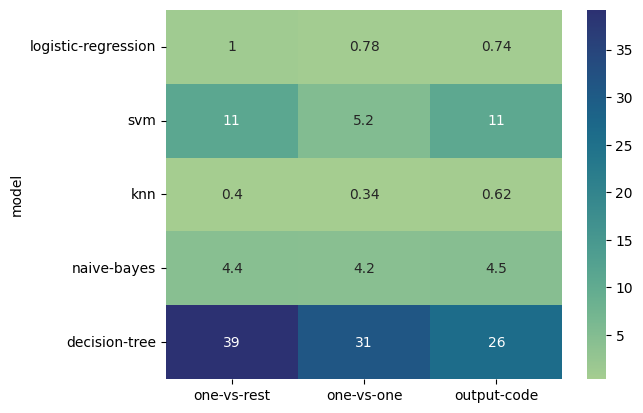

In [48]:
sns.heatmap(df_time, annot=True, cmap="crest")

In [49]:
training_results[0]["model"]

'logistic-regression'

In [50]:
df_accuracy = pd.DataFrame.from_records(tr_accuracy)
df_accuracy = df_accuracy.set_index(["model"])
df_accuracy

,one-vs-rest,one-vs-one,output-code
model,,,
logistic-regression,0.440,0.455,0.415
svm,0.380,0.430,0.395
knn,0.420,0.440,0.385
naive-bayes,0.335,0.335,0.330
decision-tree,0.445,0.465,0.325


<AxesSubplot: ylabel='model'>

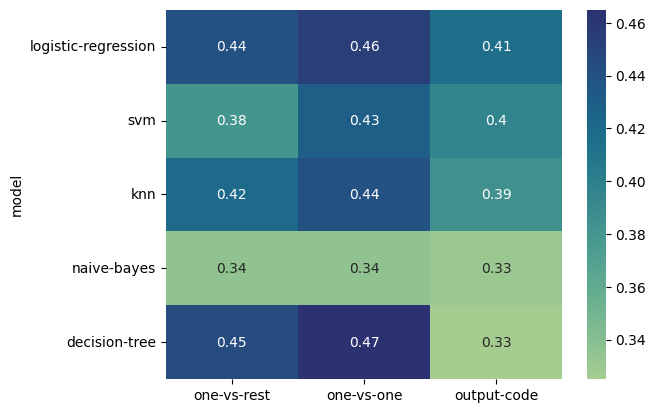

In [51]:
sns.heatmap(df_accuracy, annot=True, cmap="crest")

### The conclusion

The goal of this project was to improve [the previous results](https://github.com/Mark-Rozenberg/Crime-And-Climate) on this dataset provided by Mark Rozenberg which were 29.5% accuracy with Multi-layer perceptron model, without the climate features.

We followed these steps to accomplish this goal:
- Resampling
- Hyperparameter optimization
- Reduce dimensionality (both in records and in classes)

#### Our experiments showed that the Decision tree model with one-vs-one strategy was the highest performer with 52% accuracy. Here we should consider that our class count was 3, while the original experimenter trained for 10 classes. Overall, our and Mark's experiments show that it is hard to predict crime types given the features.

# Multilabel classification

- [x] (**+3 points**) Repeat all points for the **Multilabel classification** task (classification with multiple target features, for example, binary ones). Try **MultiOutputClassifier** and **ClassifierChain** as strategies.

In [52]:
df

,police_area,city_district,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,day_week,month,crime_type_cat,location_desc_cat
157437,1424,1.0,12,2.311494,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,6,9,2,3
58524,1632,38.0,11,3.082551,0.625000,0.0,0.0,161.333333,67.000000,30.0,103.0,5,4,2,4
130702,922,15.0,5,3.740493,96.000000,0.0,0.0,270.333333,183.333333,290.0,63.0,0,6,2,49
1021,432,10.0,10,3.198022,0.000000,0.0,0.0,309.333333,222.333333,175.0,96.0,6,6,0,39
40247,715,16.0,9,1.545184,3.714286,0.0,81.5,98.000000,13.000000,260.0,129.5,6,2,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133369,831,18.0,12,2.078841,2.428571,0.0,0.0,300.000000,205.666667,105.0,47.0,1,6,2,49
4854,2411,50.0,5,2.613149,4.875000,0.0,0.0,152.000000,70.666667,285.0,96.0,5,10,1,39
143592,914,25.0,1,0.679038,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,6,9,2,19
131718,934,20.0,5,1.853023,0.000000,0.0,0.0,163.000000,64.000000,230.0,91.5,4,4,2,39


In [53]:
X, y = df.drop(columns=["crime_type_cat", "location_desc_cat"]), df[["crime_type_cat", "location_desc_cat"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

training_results = []

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain

parameters = {
  "n_estimators": [5, 50, 200],
  "max_depth" : [None, 10,20],
  "min_samples_split" : [2, 5, 10],
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=123), parameters, n_jobs=2, cv=10)

In [55]:
# MultiOutputClassifier

start = time.time()
mo_rf = MultiOutputClassifier(gs_rf)
mo_rf.fit(X_train_scaled, y_train)
accuracy = mo_rf.score(X_test_scaled, y_test)
training_time = time.time() - start

print("training time:", training_time)
print("accuracy:", accuracy)

training_results.append({"model": "Random Forest", "strategy": "multi-output-classifier", "time": training_time, "accuracy": accuracy})

training time: 43.76713728904724
accuracy: 0.1


In [56]:
tr = pd.DataFrame.from_records(training_results)
tr = tr.set_index(["model", "strategy"])
tr

,,time,accuracy
model,strategy,,
Random Forest,multi-output-classifier,43.767137,0.1


### The conclusion

As with Multioutput regression, the accuracy is bad. It could mean that the chosen features do not explain the target features (crime_type_cat, location_desc_cat).

# Multioutput regression

- [x] (**+2 points**) Repeat all steps for the **Multioutput Regression** task (multioutput regression, real). Model to try at least one: **Ridge**. Try **MultiOutputRegressor** and **RegressorChain** as strategies. Use **R2** as the metric.

In [57]:
df

,police_area,city_district,hour,police_dist,precipitation,snowfall,snow_depth,temp_max,temp_min,wind_dir,wind_speed,day_week,month,crime_type_cat,location_desc_cat
157437,1424,1.0,12,2.311494,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,6,9,2,3
58524,1632,38.0,11,3.082551,0.625000,0.0,0.0,161.333333,67.000000,30.0,103.0,5,4,2,4
130702,922,15.0,5,3.740493,96.000000,0.0,0.0,270.333333,183.333333,290.0,63.0,0,6,2,49
1021,432,10.0,10,3.198022,0.000000,0.0,0.0,309.333333,222.333333,175.0,96.0,6,6,0,39
40247,715,16.0,9,1.545184,3.714286,0.0,81.5,98.000000,13.000000,260.0,129.5,6,2,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133369,831,18.0,12,2.078841,2.428571,0.0,0.0,300.000000,205.666667,105.0,47.0,1,6,2,49
4854,2411,50.0,5,2.613149,4.875000,0.0,0.0,152.000000,70.666667,285.0,96.0,5,10,1,39
143592,914,25.0,1,0.679038,0.000000,0.0,0.0,281.666667,161.333333,255.0,89.0,6,9,2,19
131718,934,20.0,5,1.853023,0.000000,0.0,0.0,163.000000,64.000000,230.0,91.5,4,4,2,39


In [58]:
X, y = df.drop(columns=["crime_type_cat", "location_desc_cat"]), df[["crime_type_cat", "location_desc_cat"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

training_results = []

#### Ridge

In [59]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

parameters = {"alpha":[1, 10]}
gs_ridge = GridSearchCV(Ridge(random_state=123), parameters, scoring="r2", cv=10)

In [60]:
# MultiOutputRegressor

start = time.time()
mo_regr = MultiOutputRegressor(gs_ridge)
mo_regr.fit(X_train_scaled, y_train)
y_pred = mo_regr.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("R2 score:", score)

training_results.append({"model": "ridge", "strategy": "multi-output-regressor", "time": training_time, "accuracy": score})

training time: 0.04762887954711914
R2 score: 0.004577114631685253


In [61]:
# RegressorChain

start = time.time()
regr_chain = RegressorChain(gs_ridge)
regr_chain.fit(X_train_scaled, y_train)
y_pred = regr_chain.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
training_time = time.time() - start

print("training time:", training_time)
print("R2 score:", score)

training_results.append({"model": "ridge", "strategy": "regressor-chain", "time": training_time, "accuracy": score})

training time: 0.05301690101623535
R2 score: 0.004577114631685253


In [62]:
tr = pd.DataFrame.from_records(training_results)
tr = tr.set_index(["model", "strategy"])
tr

time  accuracy
model strategy                                  
ridge multi-output-regressor  0.047629  0.004577
      regressor-chain         0.053017  0.004577

### The conclusion

The R2 score is exceptionally low, almost 0. It could mean that the chosen features do not explain the target features (crime_type_cat, location_desc_cat).